# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [2]:
diabetes = datasets.load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [4]:
diabetes["DESCR"]

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

What are the variables in this dataset according to the description? List them in the markdown cell below

The variables in this dataset are **age, sex, body mass index, average blood, pressure, and six blood serum**

Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [5]:
diabetes["data"].shape

(442, 10)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [6]:
from sklearn.linear_model import LinearRegression

Initialize the model in the variable `diabetes_model`

In [7]:
diabetes_model = LinearRegression()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [8]:
diabetes_lr = diabetes_model.fit(
                        X = diabetes["data"],
                        y = diabetes["target"]
)

diab_coef = diabetes_lr.coef_
diab_intercept = diabetes_lr.intercept_
print(diab_coef, diab_intercept)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639] 152.1334841628965


# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [9]:
import statsmodels.formula.api as smf

In [10]:
res_diabetes = smf.ols("target ~ data", data=diabetes).fit()
res_diabetes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.83e-62
Time:                        18:36:57   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
data[0]      -10.0122     59.749     -0.168      0.867    -127.448     107.424
data[1]     -239.8191     61.222     -3.917      0.000    -360.151    -119.488
data[2]      519.8398     66.534      7.813      0.000     389.069     650.610
data[3]      324.3904     65.422      4.958      0.000     195.805     452.976
data[4]     -792.1842    416.684     -1.901      0.058   -1611.169      26.801
data[5]      476.7458    339.035      1.406      0.160    -189.621    1143.113
data[6]      101.0446    212.533      0.475      0.635    -316.685     518.774
data[7]      177.0642    161.476      1.097      0.273    -140.313     494.442
data[8]      751.2793    171.902      4.370      0.000     413.409    1089.150
data[9]       67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In general, $R^2$ is under 0.518. So, our prediction does not have much confidence, it is not very robust. 
We also see coefficients with a value higher than 0.05 at the point $P>|t|$, so they are not very representative. Finally, it seems that only data[0] and data[6] contain 0.

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [11]:
import pandas as pd
auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [12]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [13]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

What is the newest model year and the oldest model year?

In [14]:
newest = auto["model_year"].max()
oldest = auto["model_year"].min()
print(newest)
print(oldest)

82
70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [15]:
auto.isna().sum().sort_values(ascending=False)

horse_power     6
car_name        0
model_year      0
acceleration    0
weight          0
displacement    0
cylinders       0
mpg             0
dtype: int64

In [16]:
auto = auto.dropna()

In [17]:
auto.isna().sum().sort_values(ascending=False)

car_name        0
model_year      0
acceleration    0
weight          0
horse_power     0
displacement    0
cylinders       0
mpg             0
dtype: int64

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [18]:
auto["cylinders"].value_counts().count()

5

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [19]:
auto = auto.drop("car_name", axis=1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
auto.corr()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horse_power,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [22]:
import seaborn as sns

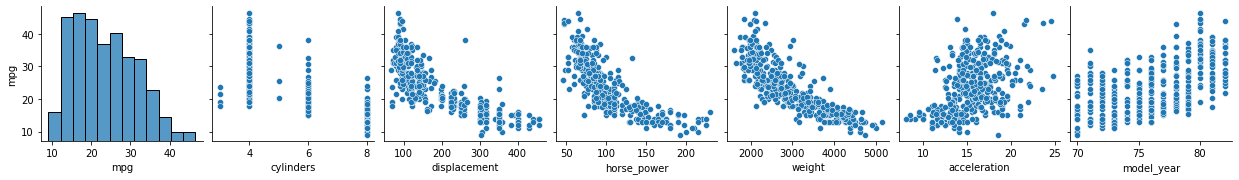

In [23]:
sns.pairplot(data=auto, y_vars=["mpg"])

In [24]:
data_X = auto[["cylinders", "displacement", "horse_power", "weight", "model_year"]]

In [25]:
data_y = auto["mpg"]

For the separation between response and target, the variable "mpg" will be set as response, and the variables that correlate with "mpg" will be set as predictors.
As we can see in the table and graphs, all of them have a significant correlation, except for acceleration, which has a very weak correlation with the variable "mpg".

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=None)

Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [27]:
a_lr = LinearRegression()

Next, fit the model in the cell below.

In [28]:
auto_lr = a_lr.fit(
                X=X_train,
                y=y_train
)

In [29]:
beta_1 = auto_lr.coef_
beta_1

array([-0.34202311,  0.00903651, -0.00958085, -0.0067988 ,  0.77271296])

In [30]:
beta_0 = auto_lr.intercept_
beta_0

-13.819198626353685

# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [35]:
y_pred = beta_0 + (X_train["cylinders"]*beta_1[0] + X_train["displacement"]*beta_1[1] + X_train["horse_power"]*beta_1[2] + X_train["weight"]*beta_1[3] + X_train["model_year"]*beta_1[4])
y_pred

231    15.332929
25      7.351303
135    17.772568
364    22.865610
17     21.622993
         ...    
306    27.991608
165    20.812812
21     22.486152
379    33.942631
387    28.545924
Length: 313, dtype: float64

In [36]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_train, y_pred)

0.810325996893832

#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [40]:
y_test_pred = beta_0 + (X_test["cylinders"]*beta_1[0] + X_test["displacement"]*beta_1[1] + X_test["horse_power"]*beta_1[2] + X_test["weight"]*beta_1[3] + X_test["model_year"]*beta_1[4])
y_test_pred


214    17.342945
289    16.523901
274    25.698636
27      8.603796
388    31.128520
         ...    
320    30.275363
125    21.098579
37     17.775200
9      13.063005
319    29.713003
Length: 79, dtype: float64

In [41]:
r2_score(y_test, y_test_pred)

0.7999477197525957

# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [46]:
X_train09, X_test09, y_train09, y_test09 = train_test_split(data_X, data_y, test_size=0.1, random_state=None)

Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [50]:
auto_model09 = LinearRegression()
auto_09 = auto_model09.fit(
                X=X_train09,
                y=y_train09
)

Compute the predicted values and r squared score for our new model and new sample data.

In [57]:
y_pred09 = auto_09.predict(X_train09)
y_pred09[:15]

array([11.80897314, 28.13043368, 28.53604712, 29.7968437 , 30.29465941,
       20.31046706, 18.50675794, 30.96658197, 28.72623212, 22.32888225,
       25.74830033, 30.11453821, 21.07226955, 21.37874453, 25.67611923])

In [58]:
r2_score(y_train09, y_pred09)

0.8037289772485285

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [59]:
y_test_pred09 = auto_09.predict(X_test09)
y_test_pred09[:15]

array([25.28051135, 20.89266328, 19.86411453, 22.88334268, 33.38754601,
       22.3469874 , 28.91971669, 16.943161  , 29.65700979, 12.04502547,
       15.32086424, 32.17692168, 24.10688246, 17.42188474, 25.05413847])

In [60]:
r2_score(y_test09, y_test_pred09)

0.8512168192472194

Yes, there is an improvement in the test.

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [61]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [79]:
est = RFE(auto_lr, n_features_to_select=3)

Fit the model and print the ranking

In [80]:
estimation = est.fit(X_train, y_train)
estimation.ranking_

array([1, 2, 1, 3, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [70]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(data_X[["cylinders","horse_power","model_year"]], data_y, test_size=0.1, random_state=None)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [71]:
auto_model_reduced = LinearRegression()
auto_red = auto_model_reduced.fit(
                X=X_train_reduced,
                y=y_train_reduced
)
y_pred_red= auto_red.predict(X_train_reduced)

In [72]:
r2_score(y_train_reduced, y_pred_red)

0.7391524239824552

Actually, it has not improved, in fact it has worsened the $R^2$ score, so the variables that we have removed really help predict y.